### Libraries for dataset manipulation and visulization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [2]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\pH_Index_with_EC_value.csv')

### Preprocessing on dataset

In [3]:
X = np.array(dataset['pH_Index'])
Y = np.array(dataset['EC_Value'])
print(X)
print(Y)

[0.00703939 0.0073076  0.00680586 ... 0.00868003 0.0176074  0.01053636]
[0.54 0.54 0.55 ... 1.1  0.45 0.45]


In [4]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y)

[[0.00703939]
 [0.0073076 ]
 [0.00680586]
 ...
 [0.00868003]
 [0.0176074 ]
 [0.01053636]] [[0.54]
 [0.54]
 [0.55]
 ...
 [1.1 ]
 [0.45]
 [0.45]]


### Standardization of input and output label

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_Y.fit_transform(y_train)
X_val = sc_X.fit_transform(X_val)

### SVR model training

In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train,y_train)

C:\Users\Mahmood Yousaf\.conda\envs\gpuEnv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Prediction 

In [7]:
prediction = regressor.predict(X_val)

In [8]:
prediction = prediction.reshape(len(prediction),1)
prediction = sc_Y.inverse_transform(prediction)

In [9]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, prediction)
mse_value = mean_squared_error(y_val, prediction)
r2_score_value = r2_score(y_val, prediction)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 1.9302756365857006
MAE 0.5356156040157355
r2_score -0.004719214741611744


### Visulization

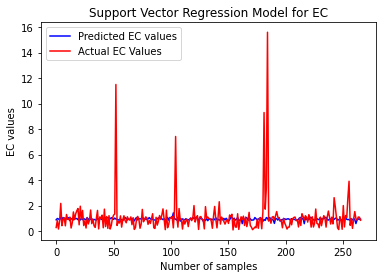

In [10]:
plt.plot(prediction,color = 'Blue')
plt.plot(y_val, color = 'red')
plt.title("Support Vector Regression Model for EC")
plt.legend(['Predicted EC values', 'Actual EC Values'], loc='upper left')
plt.xlabel('Number of samples')
plt.ylabel('EC values')
plt.savefig("SVRmodelForECestimationUsingpHIndexes.jpg")